# Descripción del proyecto

Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

Tabla rest_data:

* object_name — nombre del establecimiento,
* chain — establecimiento que pertenece a una cadena (TRUE/FALSE),
* object_type — tipo de establecimiento,
* address — dirección,
* number — número de asientos,

## Preparación de los datos

In [1]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

In [2]:
# Se importa el dataframe
rest_data=pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
print(rest_data)

         id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S            100 WORLD WAY 120  False   
2     11788       STREET CHURROS      6801 HOLLYWOOD BLVD 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9646  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9647  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9648  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9649  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9650  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number  
0           Cafe      26  
1     Restaurant       9  
2      Fast Food      20  
3     Restaurant      22  


In [4]:
#Revisamos la frecuencia de algunas calles.
rest_data['address'].value_counts()

3607 TROUSDALE PKWY             11
135 N GRAND AVE                 10
600 WORLD WAY                    9
5151 STATE UNIVERSITY DR         9
400 WORLD WAY                    9
                                ..
10250 SANTA MONICA BLVD 1790     1
11700 NATIONAL BLVD STE #N       1
3785 WILSHIRE BLVD STE 32        1
5401 S FIGUEROA ST               1
926 BROXTON AVE                  1
Name: address, Length: 8512, dtype: int64

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [6]:
rest_data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [7]:
#Revisamos cuantos valores ausentes tenemos
rest_data['chain'].isna().sum()

3

In [8]:
# Se verifica que nuestras columnas que almacenan valores que deben ser unicos no contengan duplicados.
rest_data['id'].duplicated().sum()

0

In [9]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [10]:
rest_data.head(2)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9


In [11]:
#Cambiamos las leyendas de nuestra columna chain para que sea mas fácil usarla en gráficos.
rest_data['chain'] = rest_data['chain'].replace({True:'Pertenece a una cadena',False:'No pertenece a una cadena'})
rest_data.head(1)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,No pertenece a una cadena,Cafe,26


### Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [12]:
#Visualizamos que tipos de establecimientos tenemos
rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [13]:
# Agrupamos por tipo de establecimiento y contamos cuantos existen por categoria.
category= rest_data.groupby('object_type').agg(quantity=('object_type', 'count')).reset_index().sort_values(by='quantity',ascending=False)
category

,object_type,quantity
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


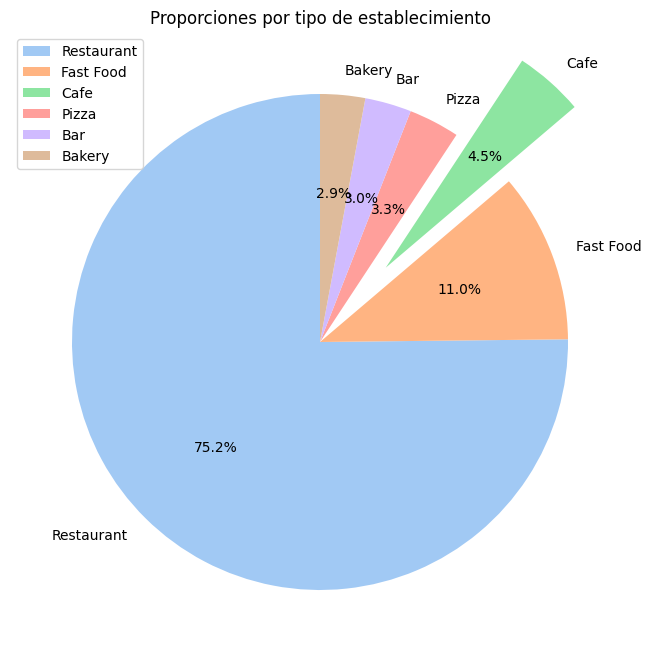

<Figure size 640x480 with 0 Axes>

In [14]:
#creamos un grafico de pastel para representar las proporciones de las categorias de establecimiento.

fig, test = plt.subplots()
#creamos una variable para extraer cafe del grafico
extraccion= 0,0,0.4,0,0,0
plt.pie(
    category.quantity,
    labels=category.object_type,
    autopct='%1.1f%%',
    startangle=90,
    explode=extraccion,
    colors=sns.color_palette('pastel')
)

#agregamos la leyenda al gráfico
test.legend()

#agregamos un titulo
test.set_title('Proporciones por tipo de establecimiento')

#cambiamos las dimensiones del gráfico
fig.set_figheight(10)# altura (height)
fig.set_figwidth(8) # anchura (width)
plt.show()
plt.savefig('grafico_proporciones_establecimiento.png', format='png', dpi=300, bbox_inches='tight')

Podemos observar en este grafico de pastel que los restaurantes representan al 75% de los negocios dentro de la ciudad, por otro lado, las cafeterias representan solo el 4.5% de los establecimientos, lo cuál indica que tendriamos mayores posibilidades de tener exito ya que la competencia es mucho menor que la de un restaurante.

### Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.


In [15]:
#Agrupamos por cadena y contamos las veces que se repite.
chain_proportion  = rest_data.groupby('chain').agg(chain_count=('chain','count')).reset_index()
chain_proportion

,chain,chain_count
0,No pertenece a una cadena,5972
1,Pertenece a una cadena,3676


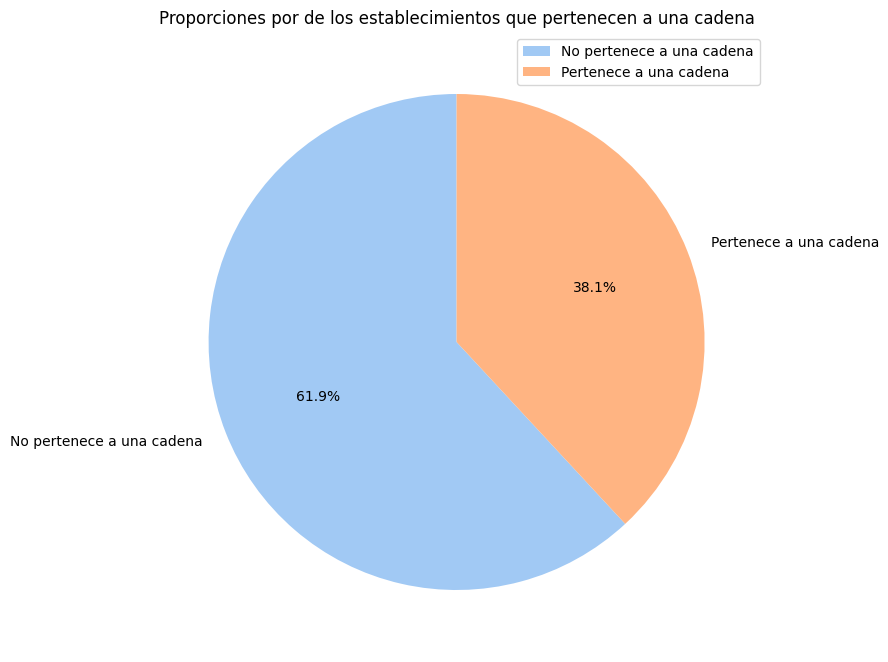

In [16]:
fig, test = plt.subplots()

plt.pie(
    chain_proportion.chain_count,
    labels= chain_proportion.chain,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
#agregamos la leyenda al gráfico
test.legend()

#agregamos un titulo
test.set_title('Proporciones por de los establecimientos que pertenecen a una cadena')

#cambiamos las dimensiones del gráfico
fig.set_figheight(10)# altura (height)
fig.set_figwidth(8) # anchura (width)

plt.show()

Por otro lado, podemos observar que solo el 38% de los establecimientos pertenece a una franquicia, lo cual nos indica que la mayoria de los establecimientos son unicos, brindandonos oportunidad frente al 61% de resaltar por nuestra tematica unica de robots como meseros.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [17]:
#Agrupamos por tipo de establecimiento y cadena, utilizamos size para obtener el tamaño de cada grupo, y unstack para cambiar las columnas

chain_count= rest_data.groupby(['object_type','chain']).size().unstack(fill_value=0)

proportions = chain_count.div(chain_count.sum(axis=1),axis=0).sort_values(by='Pertenece a una cadena',ascending=False)
proportions 
proportions

chain,No pertenece a una cadena,Pertenece a una cadena
object_type,,
Bakery,0.000000,1.000000
Cafe,0.388506,0.611494
Fast Food,0.432458,0.567542
Pizza,0.520376,0.479624
Restaurant,0.683993,0.316007
Bar,0.736301,0.263699


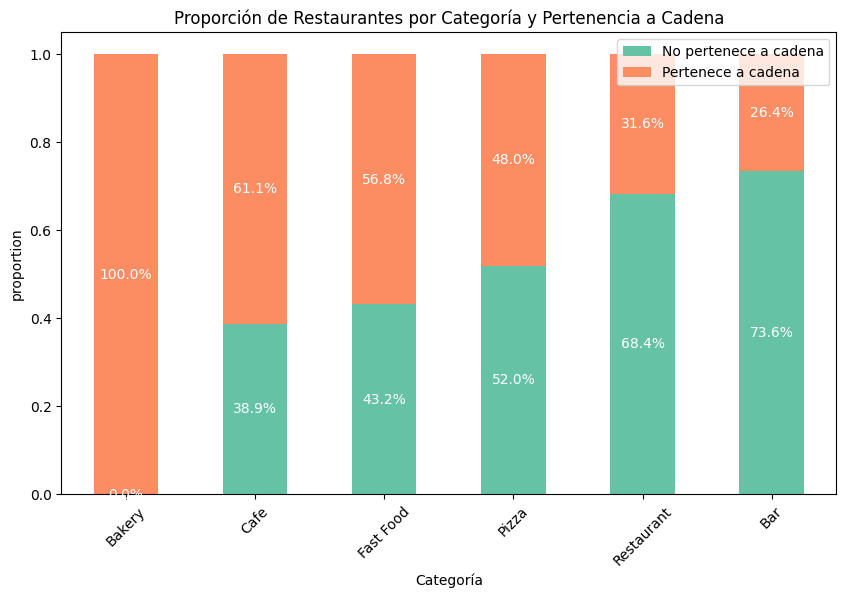

In [18]:
#Creamos gráfico de barras con los valores encimados para que sea representativa la proporción. 
proportions.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], figsize=(10, 6))
plt.title('Proporción de Restaurantes por Categoría y Pertenencia a Cadena')
plt.xlabel('Categoría')
plt.ylabel('proportion')
plt.xticks(rotation=45)
plt.legend(['No pertenece a cadena', 'Pertenece a cadena'])

# Añadir los valores de proporción sobre cada barra
for index, bar in enumerate(plt.gca().patches):
    # Obtenemos las coordenadas x e y para posicionar el texto
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    
    # Obtenemos el valor de la altura de la barra, que corresponde a la proporción
    height = bar.get_height()
    
    # Mostramos el valor en el gráfico
    plt.gca().text(x, y, f'{height * 100:.1f}%', ha='center', va='center', color='white')

plt.show()

En este gráfico podemos observar la proporcion que representan los establecimientos en cada una de sus categorias, estan ordenados conforme al porcentaje de establecimientos que conforman parte de una cadena.
* Podemos observar que las panaderias son las que en un 100% son establecimientos de cadena.
* Para el ramo de nuestro negocio de la cafeteria, obtenemos que solo 38.9% de los establecimientos no pertenecen a una cadena, en nuestro caso es favorable ya que estariamos compitiendo directamente contra este porcentaje. 

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [19]:
#Filtramos solo los establecimientos que pertenecen a una cadena.
chain_filtered = rest_data[rest_data['chain']=='Pertenece a una cadena']
chain_filtered.describe(percentiles= [0.25,0.50,0.75,0.8, 0.9,0.95])

,id,number
count,3676.000000,3676.000000
mean,16626.003808,39.694233
std,2747.437824,43.437212
min,11794.000000,1.000000
25%,14281.500000,13.000000
50%,16624.500000,25.000000
75%,19015.500000,44.000000
80%,19483.000000,48.000000
90%,20361.000000,107.000000
95%,20847.250000,140.000000


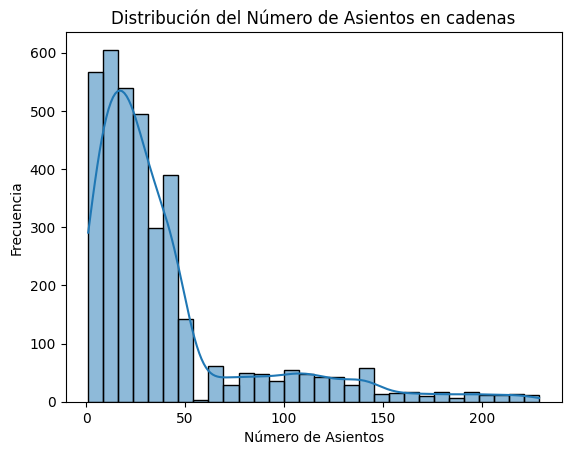

In [20]:
# Crear histograma para la distribución del número de asientos
sns.histplot(
    data=chain_filtered,
    x='number',
    bins=30,  # Ajusta el número de bins según tus necesidades
    kde=True,  # Agregar una línea de densidad estimada
    palette='viridis'  # Cambia la paleta de colores si lo deseas
)

plt.title('Distribución del Número de Asientos en cadenas')
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')
plt.show()

Aunque nuestra distribución no nos arrojo una campana, podemos observar que las cadenas tienen tendencia a tener poco numeros de asientos. Que representa aproximadamente al 80% de los restaurantes de cadena. Por lo cual, seria bueno tomar este dato como base para establecer el numero de asientos que deberia tener nuestro establecimiento.


### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

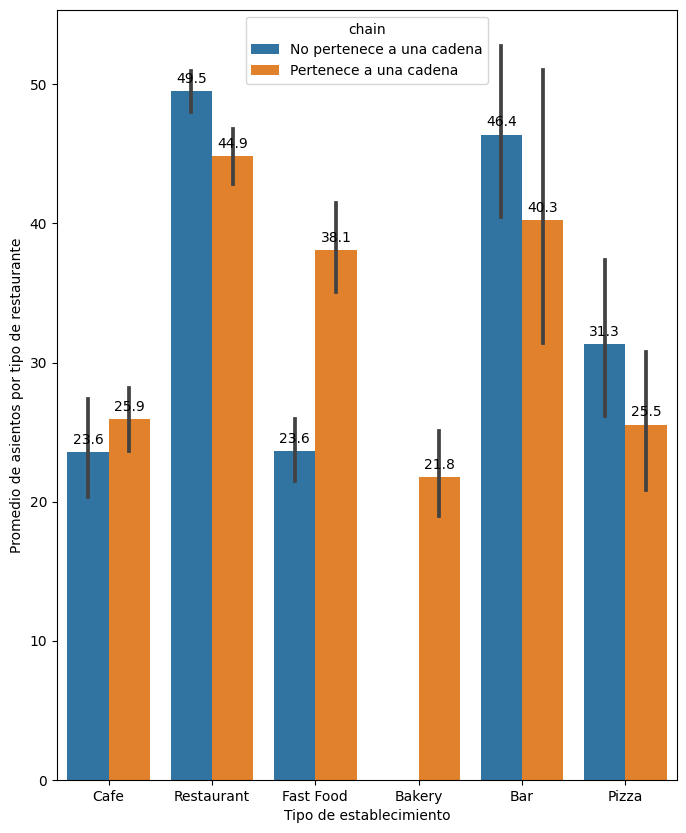

In [21]:
#usar el condicionador mean
fig, test = plt.subplots()
ax = sns.barplot(
    x='object_type',
    y='number',
    data=rest_data,
    estimator=mean,
    hue= 'chain'
)
# Cambiar las leyendas de los ejes
ax.set_xlabel('Tipo de establecimiento')
ax.set_ylabel('Promedio de asientos por tipo de restaurante')

# Agregar etiquetas manualmente
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f'),  # Formato del texto de la etiqueta
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición de la etiqueta
        ha='center', va='center',      # Alineación del texto
        xytext=(0, 9),                 # Desplazamiento de la posición del texto
        textcoords='offset points'     # Coordenadas del texto
    )
fig.set_figheight(10)# altura (height)
fig.set_figwidth(8) # anchura (width)
plt.show()


Contamos que tanto los restaurantes como los bares tienen un mayor número de asientos, por otro lado, las cafeterias guardan una misma proporción, 

### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [22]:
print(rest_data['address'])

0            3708 N EAGLE ROCK BLVD
1                 100 WORLD WAY 120
2           6801 HOLLYWOOD BLVD 253
3                1814 W SUNSET BLVD
4                2100 ECHO PARK AVE
                   ...             
9646               217 W TEMPLE AVE
9647               5750 MELROSE AVE
9648            6741 HOLLYWOOD BLVD
9649        548 S SPRING ST STE 100
9650    1300 S SAN PEDRO ST STE 111
Name: address, Length: 9651, dtype: object


In [23]:
# Utilizamos lambda para extraer el nombre de la calle.
rest_data['street_name'] = rest_data['address'].apply(lambda x: ' '.join(x.split()[1:]))

In [24]:
rest_data

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,No pertenece a una cadena,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,No pertenece a una cadena,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,No pertenece a una cadena,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,No pertenece a una cadena,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,No pertenece a una cadena,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,No pertenece a una cadena,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,No pertenece a una cadena,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,Pertenece a una cadena,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,No pertenece a una cadena,Cafe,6,S SPRING ST STE 100


### Traza un gráfico de las diez mejores calles por número de restaurantes.

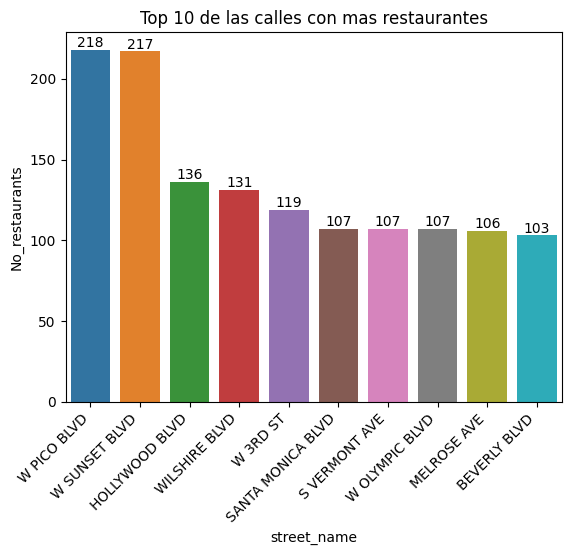

In [25]:
#Creamos una variable con las 10 calles con mas restaurantes
restaurant_filtered=rest_data[rest_data['object_type']=='Restaurant']
top_10_streets = restaurant_filtered['street_name'].value_counts().head(10).reset_index()

top_10_streets.columns = ['street_name', 'No_restaurants']   
#Creamos un gráfico de barras.
ax = sns.barplot(
    x='street_name',
    y='No_restaurants',
    data=top_10_streets,

)
plt.title('Top 10 de las calles con mas restaurantes')
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom')  # Ajuste va='bottom' para colocar el texto encima de las barras

plt.xticks(rotation=45, ha='right')
plt.show()

En el caso de Pico blvd y Sunset Blvd casi tienen el doble de restaurantes que el resto de calles del top, por lo que no serian buena opción para colocar un establecimiento en estas dos calles que estan muy saturadas.
Por otro lado, se podria usar estas calles como punto de partida para encontrar calles aledañas para ubicar nuestro establecimiento, reduciendo la competencia en la misma calle.

### Encuentra el número de calles que solo tienen un restaurante.

In [26]:
#Se crea un filtro que devuelva solo las calles que tienen un restaurante.
only_one_restaurant=restaurant_filtered['street_name'].value_counts().reset_index()
only_one_restaurant.columns=['street_name','num_restaurant']
only_one_restaurant=only_one_restaurant[only_one_restaurant['num_restaurant']==1]
total_streets = only_one_restaurant.sum()
print(only_one_restaurant)


                  street_name  num_restaurant
514             N CENTRAL AVE               1
515   W CESAR CHAVEZ AVE #107               1
516             W 3RD ST #312               1
517      S WESTERN AVE STE #C               1
518              S BROADWAY C               1
...                       ...             ...
2481               W 6TH ST B               1
2482    SANTA MONICA BLVD PC1               1
2483  S FIGUEROA ST STE #418B               1
2484      1/2 N HILLHURST AVE               1
2485            W 9TH ST #108               1

[1972 rows x 2 columns]


In [27]:
print(f'El número de calles con un restaurante suman un total de {only_one_restaurant["num_restaurant"].sum()} calles.')

El número de calles con un restaurante suman un total de 1972 calles.


Podriamos ubicar nuestro establecimiento en alguna de estas calles, pero antes deberiamos filtrar las calles a las cuales esten mas cerca del centro de la ciudad, o cerca de puntos de interes, para captar clientes, ya que la competencia en estas calles sera muy baja y eso podría ser una ventaja competitiva.

### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [28]:
#recrea un filtro apartir de las calles que se encuentran en el top10 de restaurantes.
pop_restaurant = restaurant_filtered[restaurant_filtered['street_name'].isin(top_10_streets['street_name'])]

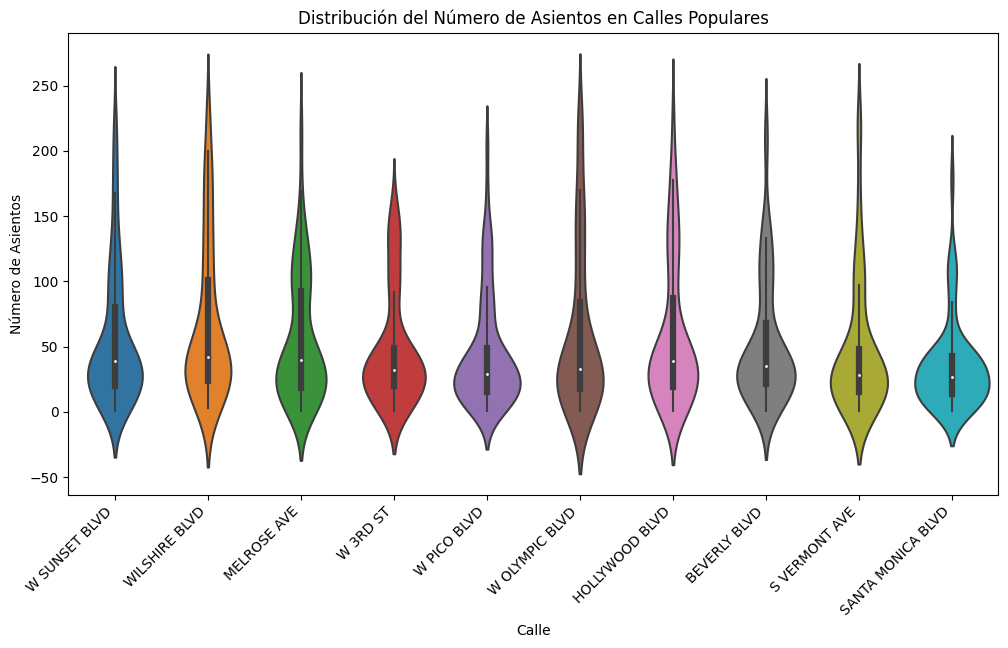

In [29]:
#se establece el tamaño del gráfico.
plt.figure(figsize=(12, 6))

# Gráfico de violín
sns.violinplot(
    x='street_name',
    y='number',
    data=pop_restaurant
)
plt.title('Distribución del Número de Asientos en Calles Populares')
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos observar que Santa Monica es la calle con mayor número de asientos, esto puede deberse a diversos factores como el transito de las personas, los sitios de interes cercanos y algun otro factor que atraiga más gente por esa zona que el restaurante requiera más asientos.

## Preparar una presentación

Presentation: <https://www.canva.com/design/DAGNSZir8F0/h0JvporFLmYd3ZDM1qihJw/edit?utm_content=DAGNSZir8F0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton>